In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('result_copy.csv')
df

,volume,Per5d,VOLUME_SENTIMENT_7DAY,SENTIMENT_SCORE_7DAY,VOLUME_SENTIMENT_30DAY,SENTIMENT_SCORE_30DAY,portfolio,sector,MarketcapValue,Consecutive_Sentiment_Score,VIX Adj Close,VIX %_Change
0,28346286.0,140.420372,13.0,0.4004,58.0,0.2492,Russell 1,Consumer Services,Mid Cap,0,24.459999,-0.05
1,9660547.0,122.127660,14.0,0.1638,45.0,0.1757,Russell 1,Health Technology,Large Cap,0,46.799999,-0.08
2,1537762.0,102.437870,9.0,0.0596,52.0,0.2129,Russell 1,Health Technology,Large Cap,2,26.870001,-0.10
3,21631003.0,71.088861,27.0,-0.1304,58.0,-0.2655,Russell 1,Utilities,Large Cap,0,19.520000,-0.06
4,1044615.0,69.957983,2.0,0.2500,4.0,0.1583,Russell 1,Health Technology,Mid Cap,0,15.000000,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...
407970,15241179.0,NaN,65.0,0.0605,484.0,0.1587,Russell 1,Technology Services,Large Cap,0,26.270000,0.00
407971,15237174.0,NaN,35.0,0.1485,95.0,0.1341,Russell 1,Technology Services,Mid Cap,0,26.270000,0.00
407972,2123013.0,NaN,11.0,0.0468,143.0,0.1300,Russell 1,Technology Services,Large Cap,0,26.270000,0.00
407973,1046340.0,NaN,5.0,0.2001,31.0,0.2104,Russell 1,Health Technology,Large Cap,0,26.270000,0.00


## 1. Data Cleaning and Processing

**Cleaning missing values**

In [3]:
df = df[df['VIX %_Change'].notna()]

In [4]:
df = df[df['Per5d'].notna()]
df

,volume,Per5d,VOLUME_SENTIMENT_7DAY,SENTIMENT_SCORE_7DAY,VOLUME_SENTIMENT_30DAY,SENTIMENT_SCORE_30DAY,portfolio,sector,MarketcapValue,Consecutive_Sentiment_Score,VIX Adj Close,VIX %_Change
0,28346286.0,140.420372,13.0,0.4004,58.0,0.2492,Russell 1,Consumer Services,Mid Cap,0,24.459999,-0.05
1,9660547.0,122.127660,14.0,0.1638,45.0,0.1757,Russell 1,Health Technology,Large Cap,0,46.799999,-0.08
2,1537762.0,102.437870,9.0,0.0596,52.0,0.2129,Russell 1,Health Technology,Large Cap,2,26.870001,-0.10
3,21631003.0,71.088861,27.0,-0.1304,58.0,-0.2655,Russell 1,Utilities,Large Cap,0,19.520000,-0.06
4,1044615.0,69.957983,2.0,0.2500,4.0,0.1583,Russell 1,Health Technology,Mid Cap,0,15.000000,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...
406936,38969055.0,-46.909903,48.0,-0.1059,143.0,0.0234,Russell 1,Energy Minerals,Large Cap,0,41.940000,0.06
406937,10198118.0,-61.014493,3.0,-0.0987,44.0,0.1727,Russell 1,Energy Minerals,Mid Cap,0,41.940000,0.06
406938,487894.0,-53.977615,11.0,0.1218,65.0,0.1538,Russell 1,Health Technology,Mid Cap,0,14.800000,-0.07
406939,1507414.0,-61.394558,4.0,0.2904,28.0,0.1783,Russell 1,Technology Services,Mid Cap,0,30.430000,-0.04


**Label target values**

In [5]:
def label_Per5d(row):
    if row['Per5d'] >= 0:
        return '1'
    if row['Per5d'] < 0:
        return '0'

In [6]:
df['Per5d_labeled'] = df.apply(lambda row: label_Per5d(row), axis=1)
df

,volume,Per5d,VOLUME_SENTIMENT_7DAY,SENTIMENT_SCORE_7DAY,VOLUME_SENTIMENT_30DAY,SENTIMENT_SCORE_30DAY,portfolio,sector,MarketcapValue,Consecutive_Sentiment_Score,VIX Adj Close,VIX %_Change,Per5d_labeled
0,28346286.0,140.420372,13.0,0.4004,58.0,0.2492,Russell 1,Consumer Services,Mid Cap,0,24.459999,-0.05,1
1,9660547.0,122.127660,14.0,0.1638,45.0,0.1757,Russell 1,Health Technology,Large Cap,0,46.799999,-0.08,1
2,1537762.0,102.437870,9.0,0.0596,52.0,0.2129,Russell 1,Health Technology,Large Cap,2,26.870001,-0.10,1
3,21631003.0,71.088861,27.0,-0.1304,58.0,-0.2655,Russell 1,Utilities,Large Cap,0,19.520000,-0.06,1
4,1044615.0,69.957983,2.0,0.2500,4.0,0.1583,Russell 1,Health Technology,Mid Cap,0,15.000000,-0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406936,38969055.0,-46.909903,48.0,-0.1059,143.0,0.0234,Russell 1,Energy Minerals,Large Cap,0,41.940000,0.06,0
406937,10198118.0,-61.014493,3.0,-0.0987,44.0,0.1727,Russell 1,Energy Minerals,Mid Cap,0,41.940000,0.06,0
406938,487894.0,-53.977615,11.0,0.1218,65.0,0.1538,Russell 1,Health Technology,Mid Cap,0,14.800000,-0.07,0
406939,1507414.0,-61.394558,4.0,0.2904,28.0,0.1783,Russell 1,Technology Services,Mid Cap,0,30.430000,-0.04,0


**Drop selected rows**

In [7]:
df.drop(df[df.portfolio == 'SCG'].index)
df

,volume,Per5d,VOLUME_SENTIMENT_7DAY,SENTIMENT_SCORE_7DAY,VOLUME_SENTIMENT_30DAY,SENTIMENT_SCORE_30DAY,portfolio,sector,MarketcapValue,Consecutive_Sentiment_Score,VIX Adj Close,VIX %_Change,Per5d_labeled
0,28346286.0,140.420372,13.0,0.4004,58.0,0.2492,Russell 1,Consumer Services,Mid Cap,0,24.459999,-0.05,1
1,9660547.0,122.127660,14.0,0.1638,45.0,0.1757,Russell 1,Health Technology,Large Cap,0,46.799999,-0.08,1
2,1537762.0,102.437870,9.0,0.0596,52.0,0.2129,Russell 1,Health Technology,Large Cap,2,26.870001,-0.10,1
3,21631003.0,71.088861,27.0,-0.1304,58.0,-0.2655,Russell 1,Utilities,Large Cap,0,19.520000,-0.06,1
4,1044615.0,69.957983,2.0,0.2500,4.0,0.1583,Russell 1,Health Technology,Mid Cap,0,15.000000,-0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406936,38969055.0,-46.909903,48.0,-0.1059,143.0,0.0234,Russell 1,Energy Minerals,Large Cap,0,41.940000,0.06,0
406937,10198118.0,-61.014493,3.0,-0.0987,44.0,0.1727,Russell 1,Energy Minerals,Mid Cap,0,41.940000,0.06,0
406938,487894.0,-53.977615,11.0,0.1218,65.0,0.1538,Russell 1,Health Technology,Mid Cap,0,14.800000,-0.07,0
406939,1507414.0,-61.394558,4.0,0.2904,28.0,0.1783,Russell 1,Technology Services,Mid Cap,0,30.430000,-0.04,0


**Categorical encoding using Label Encoding**

In [8]:
from sklearn.preprocessing import LabelEncoder
le_sector = LabelEncoder()
le_MarketcapValue = LabelEncoder()

In [9]:
df['sector'] = le_sector.fit_transform(df['sector'])
df['MarketcapValue'] = le_MarketcapValue.fit_transform(df['MarketcapValue'])

In [10]:
df

,volume,Per5d,VOLUME_SENTIMENT_7DAY,SENTIMENT_SCORE_7DAY,VOLUME_SENTIMENT_30DAY,SENTIMENT_SCORE_30DAY,portfolio,sector,MarketcapValue,Consecutive_Sentiment_Score,VIX Adj Close,VIX %_Change,Per5d_labeled
0,28346286.0,140.420372,13.0,0.4004,58.0,0.2492,Russell 1,4,3,0,24.459999,-0.05,1
1,9660547.0,122.127660,14.0,0.1638,45.0,0.1757,Russell 1,10,0,0,46.799999,-0.08,1
2,1537762.0,102.437870,9.0,0.0596,52.0,0.2129,Russell 1,10,0,2,26.870001,-0.10,1
3,21631003.0,71.088861,27.0,-0.1304,58.0,-0.2655,Russell 1,18,0,0,19.520000,-0.06,1
4,1044615.0,69.957983,2.0,0.2500,4.0,0.1583,Russell 1,10,3,0,15.000000,-0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406936,38969055.0,-46.909903,48.0,-0.1059,143.0,0.0234,Russell 1,7,0,0,41.940000,0.06,0
406937,10198118.0,-61.014493,3.0,-0.0987,44.0,0.1727,Russell 1,7,3,0,41.940000,0.06,0
406938,487894.0,-53.977615,11.0,0.1218,65.0,0.1538,Russell 1,10,3,0,14.800000,-0.07,0
406939,1507414.0,-61.394558,4.0,0.2904,28.0,0.1783,Russell 1,16,3,0,30.430000,-0.04,0


## 2. Modeling

In [11]:
inputs = df.drop('Per5d',axis='columns')
inputs = inputs.drop('portfolio',axis='columns')
inputs = inputs.drop('Per5d_labeled',axis='columns')

In [12]:
inputs

,volume,VOLUME_SENTIMENT_7DAY,SENTIMENT_SCORE_7DAY,VOLUME_SENTIMENT_30DAY,SENTIMENT_SCORE_30DAY,sector,MarketcapValue,Consecutive_Sentiment_Score,VIX Adj Close,VIX %_Change
0,28346286.0,13.0,0.4004,58.0,0.2492,4,3,0,24.459999,-0.05
1,9660547.0,14.0,0.1638,45.0,0.1757,10,0,0,46.799999,-0.08
2,1537762.0,9.0,0.0596,52.0,0.2129,10,0,2,26.870001,-0.10
3,21631003.0,27.0,-0.1304,58.0,-0.2655,18,0,0,19.520000,-0.06
4,1044615.0,2.0,0.2500,4.0,0.1583,10,3,0,15.000000,-0.08
...,...,...,...,...,...,...,...,...,...,...
406936,38969055.0,48.0,-0.1059,143.0,0.0234,7,0,0,41.940000,0.06
406937,10198118.0,3.0,-0.0987,44.0,0.1727,7,3,0,41.940000,0.06
406938,487894.0,11.0,0.1218,65.0,0.1538,10,3,0,14.800000,-0.07
406939,1507414.0,4.0,0.2904,28.0,0.1783,16,3,0,30.430000,-0.04


In [13]:
target = df['Per5d_labeled']
target

0         1
1         1
2         1
3         1
4         1
         ..
406936    0
406937    0
406938    0
406939    0
406940    0
Name: Per5d_labeled, Length: 399765, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21951, 13754],
       [ 8115, 36133]])

In [18]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     35705
           1       0.72      0.82      0.77     44248

    accuracy                           0.73     79953
   macro avg       0.73      0.72      0.72     79953
weighted avg       0.73      0.73      0.72     79953



In [19]:
model.feature_importances_

array([0.14147048, 0.09265638, 0.13626903, 0.12154651, 0.14185139,
       0.07578977, 0.01071275, 0.01106214, 0.1684829 , 0.10015867])

In [20]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

 VIX Adj Close                 0.168483
SENTIMENT_SCORE_30DAY          0.141851
volume                         0.141470
SENTIMENT_SCORE_7DAY           0.136269
VOLUME_SENTIMENT_30DAY         0.121547
VIX %_Change                   0.100159
VOLUME_SENTIMENT_7DAY          0.092656
sector                         0.075790
Consecutive_Sentiment_Score    0.011062
MarketcapValue                 0.010713
dtype: float64

No handles with labels found to put in legend.


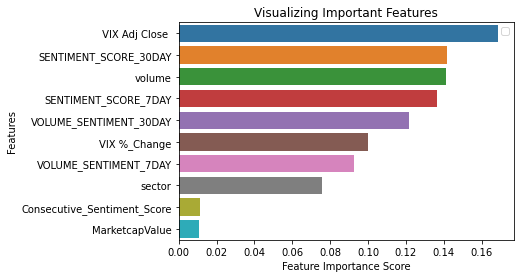

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()